In [2]:
import pandas as pd
import numpy as np

Now that we have imported the required libraries, we start by loading the necessary dataframes.

In [3]:
df_judge_case_merge_key = pd.read_csv("/kaggle/input/precogdata/csv/keys/keys/judge_case_merge_key.csv")
df_judges_clean = pd.read_csv("/kaggle/input/precogdata/csv/judges_clean/judges_clean.csv")

df_disp_name_key = pd.read_csv("/kaggle/input/precogdata/csv/keys/keys/disp_name_key.csv")

years = [i for i in range(2010, 2019)]

These were the files that can be used while completely in memory efficiently. For the cases by year files, we will need to chunk them and work with one chunk at a time.

In [4]:
%%time

# counter variables
value_count = {"female":0, "nonfemale":0} # how many females gave a convicted disp
total_count = {"female":0, "nonfemale":0} # how many females gave a disp

for year in years:

    print(f"\n{year}")
     
#     df_year = pd.read_csv(f"/kaggle/input/precogdata/cases/cases/cases_{year}.csv", low_memory=True, chunksize=100_000, iterator=True)    # was taking too long :(
    df_year = pd.read_csv(f"/kaggle/input/precogdata/csv/cases/cases/cases_{year}.csv").sample(n=10_000, random_state=4)

    sub_year = df_year
    sub_year = sub_year.dropna()

    df_merged = pd.merge(
        left = sub_year, 
        right = df_disp_name_key, 
        left_on ="disp_name", 
        right_on ="disp_name",
        how = "inner")

    df_judges_merged = pd.merge(
        left = df_judge_case_merge_key, 
        right = df_merged, 
        on = "ddl_case_id",
        how =  "inner")

    df_merged = pd.merge(
        left = df_judges_merged, 
        right = df_judges_clean, 
        left_on = "ddl_decision_judge_id",
        right_on = "ddl_judge_id",
        how = "inner")

    # keeping relevant columns  for counting
    df_temp = df_merged[['female_judge']]
    sub_total_count = df_temp.value_counts().to_dict()
    df_temp = []

    # increment total counter variable
    for i in sub_total_count:
        if i[0] == '0 nonfemale':
            total_count["nonfemale"] += sub_total_count[i]
        if i[0] == '1 female':
            total_count["female"] += sub_total_count[i]

    # keeping relevant columns only
    df_merged = df_merged[df_merged['disp_name_s'] == 'convicted']

    df_merged = df_merged[['female_judge']]
    sub_value_count = df_merged.value_counts().to_dict()

    # increment convicted counter variable
    for i in sub_value_count:
        if i[0] == '0 nonfemale':
            value_count["nonfemale"] += sub_value_count[i]
        if i[0] == '1 female':
            value_count["female"] += sub_value_count[i]

    # progress bar
    print('.', end='')


2010
.
2011
.
2012
.
2013
.
2014
.
2015
.
2016
.
2017
.
2018
.CPU times: user 6min 44s, sys: 39.5 s, total: 7min 24s
Wall time: 9min 53s


In [12]:
# how likely are female judges to convict
fem_con = value_count['female'] / total_count['female']

# how likely are male judges to convict
mal_con = value_count['nonfemale'] / total_count['nonfemale']

In [13]:
print(fem_con*100, mal_con*100)

3.0193633081719726 2.5692808257601256


### Plotting our findings.

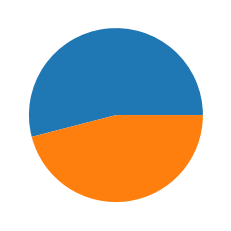

In [14]:
import matplotlib.pyplot as plt

y = np.array([fem_con*100, mal_con*100])

plt.pie(y)
plt.show() 

#### I had expected to be a disparity, that female judges gave a convicted verdict far more often/rarely compared to their male counterparts.
#### However, a pleasant surprise shows us that they are almost equally likely to give a convicted verdict.